Andrew Tomlinson 
ECE-445 Final Project
# In this Dataset we will be implementing Least Squared Regression on Boston Housing Prices

In [81]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
from pandas import read_csv
from scipy import stats # used for the statistics in fact checking the results
import seaborn as sns
from pandas import set_option
#upload the dataset
#Announce our 14 variables 
variables = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', delim_whitespace=True, names=variables)
print("dimensions of dataset are" , data.shape )
housing_prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
print(housing_prices.shape)
print(features.shape)

dimensions of dataset are (506, 14)
(506,)
(506, 13)


The labels are as follows Given to us from the dataset source
 - CRIM   -  per capita crime rate by town
 - ZN     -  proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS  -  proportion of non-retail business acres per town
 - CHAS   -  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX    -  nitric oxides concentration (parts per 10 million)
 - RM     -  average number of rooms per dwelling
 - AGE    -  proportion of owner-occupied units built prior to 1940
 - DIS    -  weighted distances to five Boston employment centres
 - RAD    -  index of accessibility to radial highways
 - TAX    -  full-value property-tax rate per 10,000
 - PTRATIO - pupil-teacher ratio by town
 - B       - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT   -  percent lower status of the population
 - MEDV    - Median value of owner-occupied homes in $1000's

Now we will make a tables that will show the some of the samples, the averages, and the correlations

In [33]:
#print("First 5 samples \n", data.head(5))
#print("\n\n The averages of this dataset are \n\n", data.describe())
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2


In [31]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


From the average table, it can be seen that ZN and CHAS are 0 both the 25 and 75% tiles. So they may not be of any use initially. Now we will check the correlations

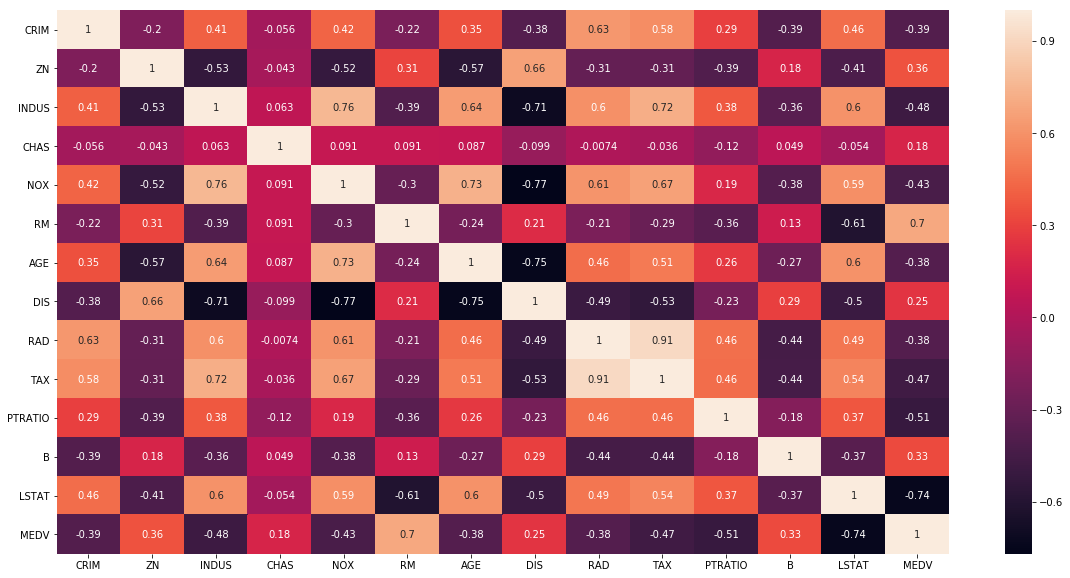

In [32]:
#Make a heatmap which will show the correlations
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),  annot=True)
#set_option('precision', 2)
#data.corr(method = 'pearson')

From the correlations, it can be seen that the Charles river dummy variable has a low correlation with the other variables. However, this is a variable that is discrete and can only be 0 or 1, so this seems reasonable. It can also be seen that the variables that have the most influence on the median value, is the average number of rooms, and the percentage of people who are poor. For variables like the age or the the low income of the residents would obviously have a negative impact on the median value. Next, we will perform the Least Squared Regression.

# Least Squared Regression
The purpose of the Regression is to prove that our Room and LSTAT Variables are good indicators for making an accurate model for our Median House Price

In [80]:

# Start the Least Squared regression

# First we set up for cross Validation where K = 5
indices = np.arange(len(housing_prices))
np.random.shuffle(indices)
splits = np.array_split(indices,5)

error = 0
# Run a for loop for the K-fold
for i in range(5):
    Test_data = features[splits[i],:]
    Test_targets = housing_prices[splits[i]]
    training_data = np.delete(features, splits[i], axis = 0)
    training_targets = np.delete(housing_prices, splits[i])
    
    X = np.hstack((training_data, np.ones(training_data.shape[0])[:,np.newaxis]))
    p_inverse = np.linalg.inv(X.T @ X) @ X.T
    coefficient = p_inverse @ training_targets
    
    Test_X = np.hstack((test_data, np.ones(test_data.shape[0])[:,np.newaxis]))
    prediction = Test_X @ coefficient
    fold_error = np.average(np.abs(prediction-Test_targets))
    error = error + fold_error
error = error/5
print('Average Prediction Error is ', error)

TypeError: unhashable type: 'numpy.ndarray'

In [95]:
X = np.hstack((features,np.ones(features.shape[0])[:,np.newaxis]))
print(X.shape)
p_inverse = np.linalg.inv(X.T @ X ) @ X.T
print(p_inverse.shape)
print(housing_prices.shape)
Coefficients = p_inverse @ housing_prices
print(Coefficients.shape)
#predicition = X @ coefficients

#plt.scatter(housing_prices, predictions)
#plt.plot((0,50),(0,50), 'r')
#plt.title("Measured Data Vs Prediction")
#plt.xlabel('Measured data')
#plt.ylabel('Predictions')
#plt.show()

(506, 14)
(14, 506)
(506,)


Exception: Dot product shape mismatch, (506,) vs (14, 506)